In [56]:
import pandas as pd

# Load the dataset to examine its contents and structure
df = pd.read_csv('spend_data.csv').iloc[:,1:]

# Display the first few rows to understand the dataset
df.head()


,Week,TV,radio,newspaper,sales
0,2020-01-05,230.1,37.8,69.2,22.1
1,2020-01-12,44.5,39.3,45.1,10.4
2,2020-01-19,17.2,45.9,69.3,9.3
3,2020-01-26,151.5,41.3,58.5,18.5
4,2020-02-02,180.8,10.8,58.4,12.9


In [57]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Week       200 non-null    object 
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [58]:
# Calculate the max and min values for all columns in the dataset
max_values = df.max()
min_values = df.min()

# Create a DataFrame to present the results
min_max_df = pd.DataFrame({
    'Max Values': max_values,
    'Min Values': min_values
})

# Display the min and max values for all columns
min_max_df

,Max Values,Min Values
Week,2023-10-29,2020-01-05
TV,296.4,0.7
radio,49.6,0.0
newspaper,114.0,0.3
sales,27.0,1.6


In [59]:
df['sales'] = df.sales * 1000
# Display the updated dataframe to verify
df.head()


,Week,TV,radio,newspaper,sales
0,2020-01-05,230.1,37.8,69.2,22100.0
1,2020-01-12,44.5,39.3,45.1,10400.0
2,2020-01-19,17.2,45.9,69.3,9300.0
3,2020-01-26,151.5,41.3,58.5,18500.0
4,2020-02-02,180.8,10.8,58.4,12900.0


In [60]:
# Calculate the max and min values for all columns in the dataset
max_values = df.max()
min_values = df.min()

# Create a DataFrame to present the results
min_max_df = pd.DataFrame({
    'Max Values': max_values,
    'Min Values': min_values
})

# Display the min and max values for all columns
min_max_df

,Max Values,Min Values
Week,2023-10-29,2020-01-05
TV,296.4,0.7
radio,49.6,0.0
newspaper,114.0,0.3
sales,27000.0,1600.0


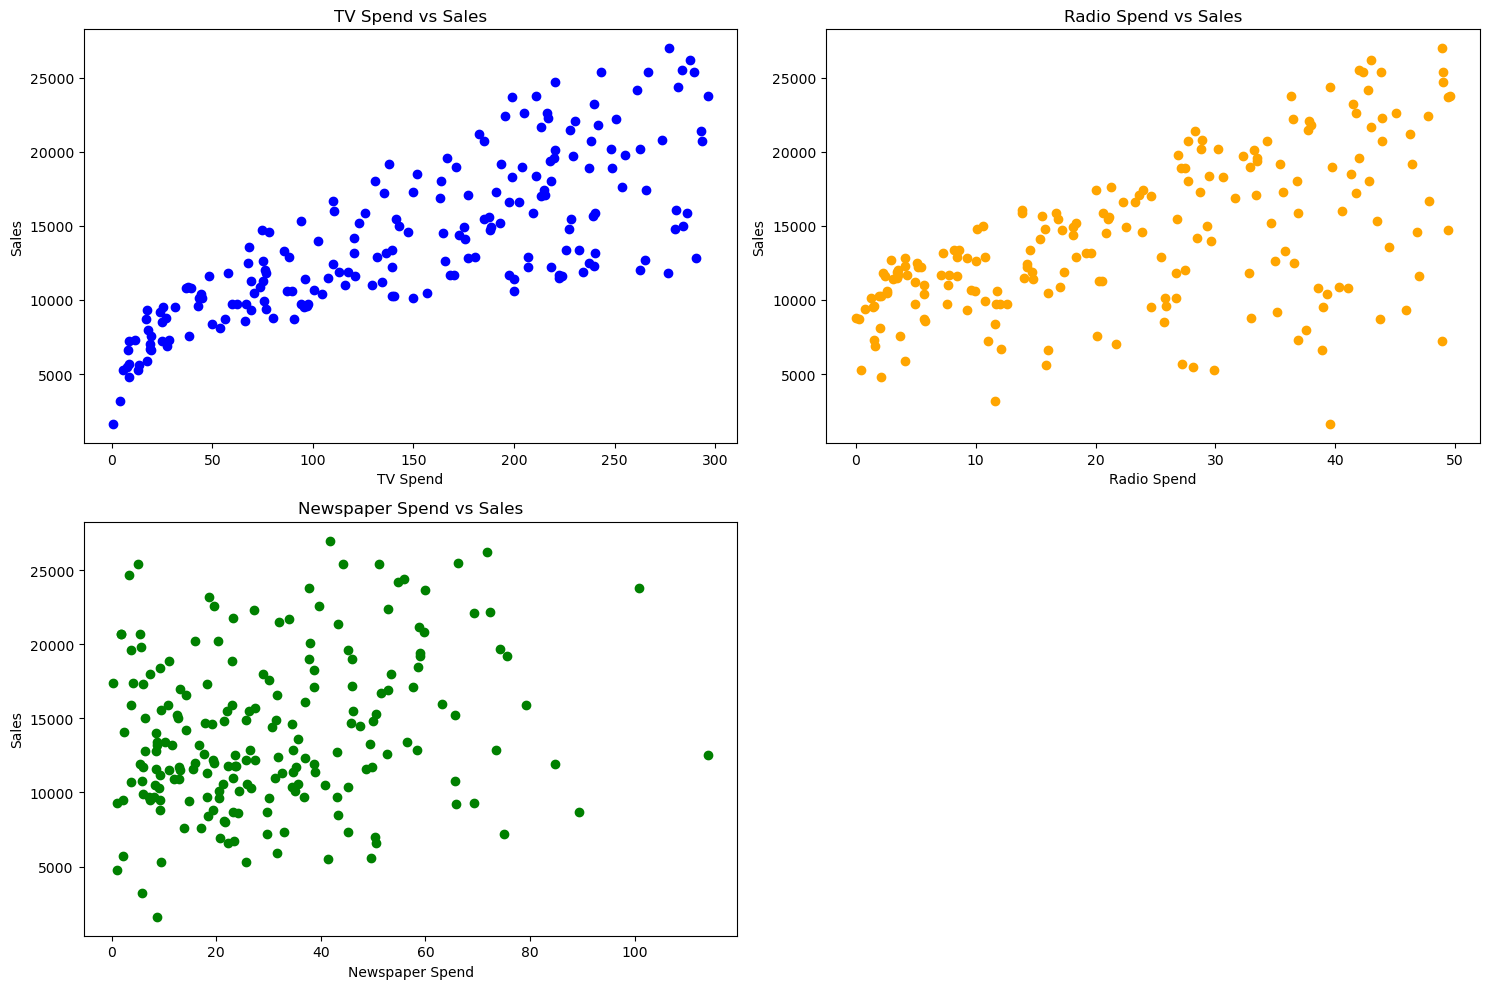

In [61]:
import matplotlib.pyplot as plt


# Create scatter plots for each feature column against the target variable 'sales'
plt.figure(figsize=(15, 10))

# Plot TV vs sales
plt.subplot(2, 2, 1)
plt.scatter(df['TV'], df['sales'], color='blue')
plt.xlabel('TV Spend')
plt.ylabel('Sales')
plt.title('TV Spend vs Sales')

# Plot radio vs sales
plt.subplot(2, 2, 2)
plt.scatter(df['radio'], df['sales'], color='orange')
plt.xlabel('Radio Spend')
plt.ylabel('Sales')
plt.title('Radio Spend vs Sales')

# Plot newspaper vs sales
plt.subplot(2, 2, 3)
plt.scatter(df['newspaper'], df['sales'], color='green')
plt.xlabel('Newspaper Spend')
plt.ylabel('Sales')
plt.title('Newspaper Spend vs Sales')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [62]:
data = df[['TV', 'radio', 'newspaper','sales']] 

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Define features and target
X = data[['TV', 'radio', 'newspaper']]  # Independent variables (ad spend channels)
y = data['sales']  # Dependent variable (sales)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics (e.g., RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Step 6: Extract the coefficients to interpret the ROI for each channel
coefficients = model.coef_
intercept = model.intercept_

# Display results
rmse, coefficients, intercept


(1781.59966153345,
 array([ 44.72951747, 189.19505423,   2.76111434]),
 2979.067338122626)

In [64]:
# R^2 is a measure of how well the model explains the variance in the data
r2_value = model.score(X_test, y_test)

r2_value


0.899438024100912

# Coefficient Equation for Sales Prediction

The linear regression equation for predicting sales based on advertising spend is:
## {Sales} = β0 + β1{TV} + β2{Radio} + β3{Newspaper}


Where:
- β0 is the intercept.
- β1, β2, β3 are the coefficients for the features TV, Radio, and Newspaper, respectively.

From our model, we have:
- Intercept (β0)) = 1781.5
- TV coefficient (β1) = 44.7
- Radio coefficient (β2) = 189.1
- Newspaper coefficient (β3) = 2.7

Thus, the final equation becomes:
## {Sales} = 1781.5 + 44.7{TV} + 189.1{Radio} + 2.7{Newspaper}

You can now use this equation to predict sales based on the advertising spend across these channels.


### Row#2 TV:44.5	Radio: 39.3	Newspaper: 45.1	 = 10400.0

In [65]:
1781.5 + (44.72*44.5) + (189.19*39.3) + (2.76*45.1)

11331.182999999999

In [83]:
1781.5 + (44.72*1) + (189.19*1) + (2.76*1)

2018.17

In [66]:
10400 - 11331.18

-931.1800000000003

In [67]:
import matplotlib.pyplot as plt

# Extracting the coefficients from the linear regression model
coefficients = [44.72951747, 189.19505423, 2.76111434]
channels = ['TV', 'radio', 'newspaper']

# Create a DataFrame for tabular display of the contribution
contribution_df = pd.DataFrame({
    'Channel': channels,
    'Coefficient': coefficients
})


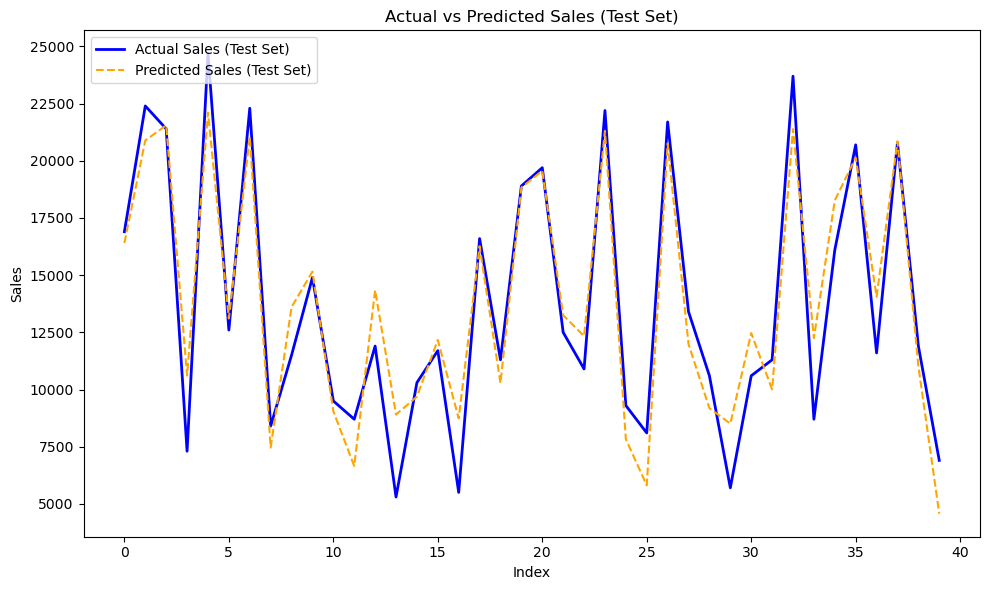

In [79]:
# Plot actual vs predicted sales for the test set

plt.figure(figsize=(10, 6))

# Plot actual sales (test set)
plt.plot(y_test.values, label='Actual Sales (Test Set)', color='blue', linewidth=2)

# Plot predicted sales (test set)
plt.plot(y_pred, label='Predicted Sales (Test Set)', color='orange', linestyle='--')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (Test Set)')
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


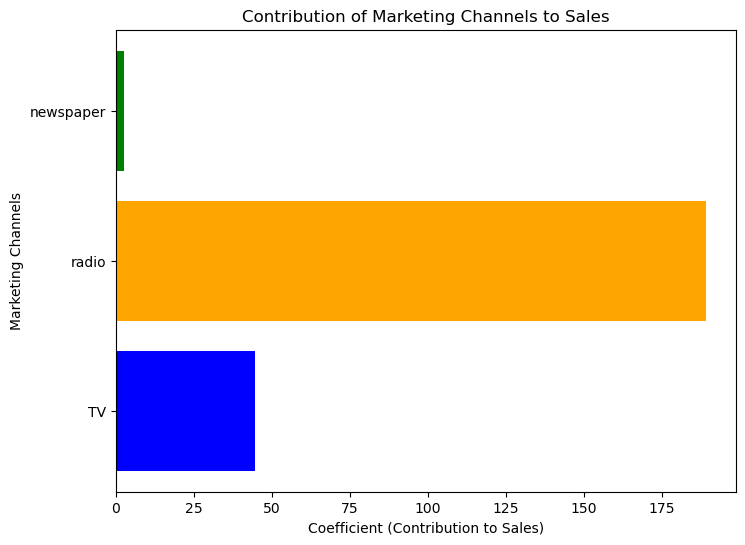

In [68]:
# Plot the contribution of each channel
plt.figure(figsize=(8, 6))
plt.barh(channels, coefficients, color=['blue', 'orange', 'green'])
plt.xlabel('Coefficient (Contribution to Sales)')
plt.ylabel('Marketing Channels')
plt.title('Contribution of Marketing Channels to Sales')
plt.show()

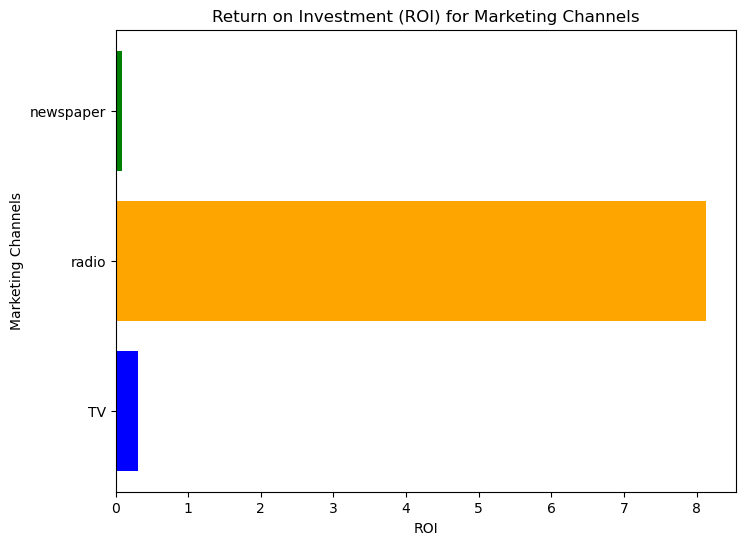

In [69]:
# Assuming the ROI (Return on Investment) can be calculated as the ratio of coefficient (impact on sales) to the average spend on each channel.
# ROI = Coefficient / Average Spend

# Calculate average spend for each channel
average_spend = df[['TV', 'radio', 'newspaper']].mean().values

# Calculate ROI for each channel
roi = coefficients / average_spend

# Create a DataFrame for ROI display
roi_df = pd.DataFrame({
    'Channel': channels,
    'Coefficient': coefficients,
    'Average Spend': average_spend,
    'ROI': roi
})

# Display the ROI table
# tools.display_dataframe_to_user(name="ROI of Marketing Channels", dataframe=roi_df)

# Plot the ROI for each channel
plt.figure(figsize=(8, 6))
plt.barh(channels, roi, color=['blue', 'orange', 'green'])
plt.xlabel('ROI')
plt.ylabel('Marketing Channels')
plt.title('Return on Investment (ROI) for Marketing Channels')
plt.show()


In [70]:
roi_df

,Channel,Coefficient,Average Spend,ROI
0,TV,44.729517,147.0425,0.304194
1,radio,189.195054,23.2640,8.132525
2,newspaper,2.761114,30.5540,0.090368


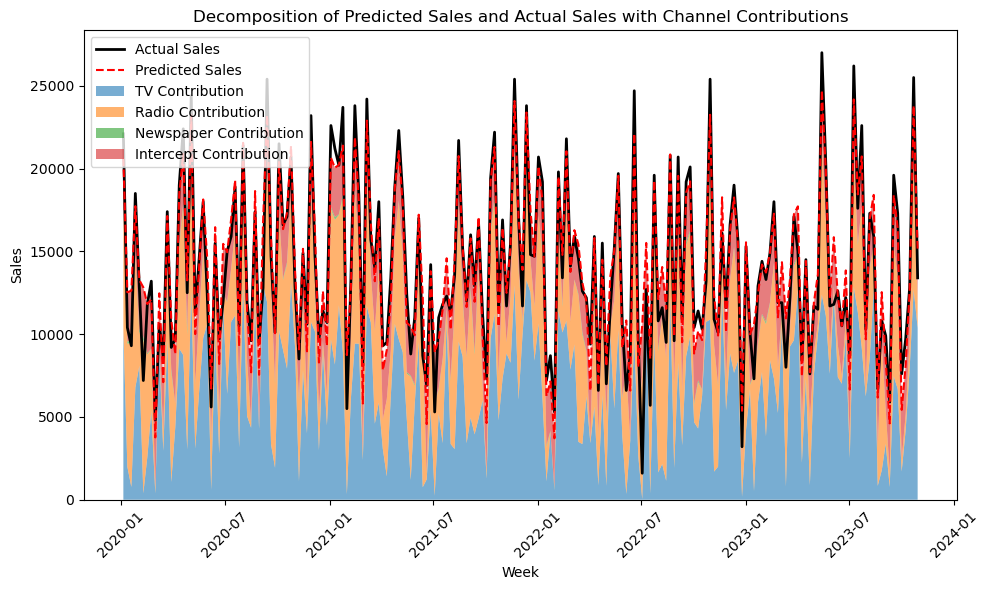

In [74]:
# Adjust the figure size for a cleaner and more standardized view
plt.figure(figsize=(10, 6))

# Plot actual sales
plt.plot(decomposed_df['Week'], decomposed_df['Actual Sales'], label='Actual Sales', color='black', linewidth=2)

# Plot predicted sales
plt.plot(decomposed_df['Week'], decomposed_df['Predicted Sales'], label='Predicted Sales', color='red', linestyle='--')

# Plot contributions from each channel
plt.stackplot(decomposed_df['Week'], 
              tv_contribution, radio_contribution, newspaper_contribution, intercept_contribution,
              labels=['TV Contribution', 'Radio Contribution', 'Newspaper Contribution', 'Intercept Contribution'],
              alpha=0.6)

# Add labels and legend
plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Decomposition of Predicted Sales and Actual Sales with Channel Contributions')
plt.legend(loc='upper left')

# Format the x-axis to show the dates properly
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


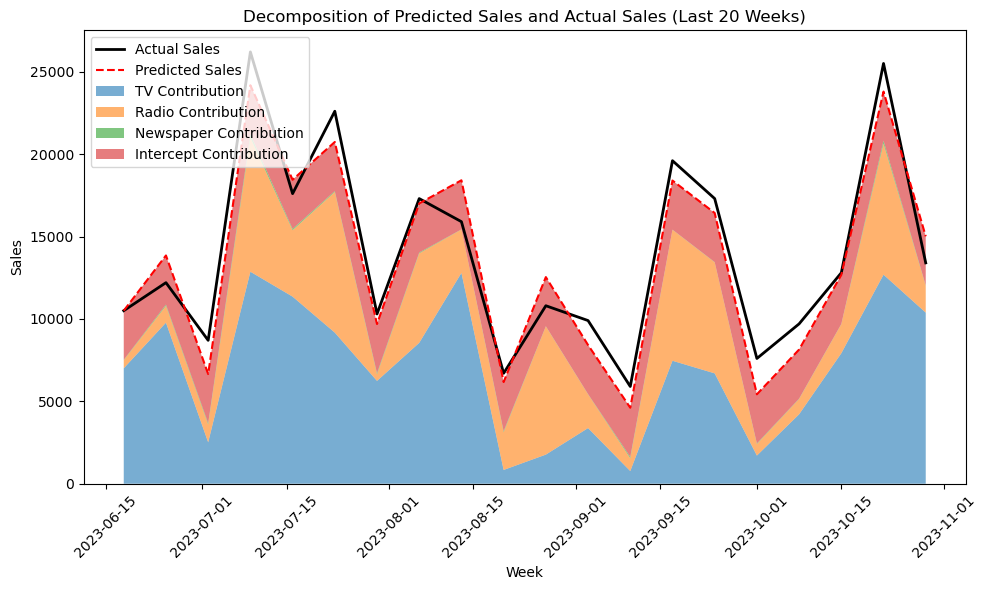

In [75]:
# Filter the data for the last 20 weeks
last_20_weeks_df = decomposed_df.tail(20)

# Plot the decomposition chart for the last 20 weeks
plt.figure(figsize=(10, 6))

# Plot actual sales
plt.plot(last_20_weeks_df['Week'], last_20_weeks_df['Actual Sales'], label='Actual Sales', color='black', linewidth=2)

# Plot predicted sales
plt.plot(last_20_weeks_df['Week'], last_20_weeks_df['Predicted Sales'], label='Predicted Sales', color='red', linestyle='--')

# Plot contributions from each channel
plt.stackplot(last_20_weeks_df['Week'], 
              last_20_weeks_df['TV Contribution'], 
              last_20_weeks_df['Radio Contribution'], 
              last_20_weeks_df['Newspaper Contribution'], 
              last_20_weeks_df['Intercept Contribution'],
              labels=['TV Contribution', 'Radio Contribution', 'Newspaper Contribution', 'Intercept Contribution'],
              alpha=0.6)

# Add labels and legend
plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Decomposition of Predicted Sales and Actual Sales (Last 20 Weeks)')
plt.legend(loc='upper left')

# Format the x-axis to show the dates properly
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


## {Sales} = β0 + β1{TV} * Adstock + β2{Radio}*Adstock + β3{Newspaper}*Adstock +  β4{Seasonality} + β5{Competitor_Spend}


In [84]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# Example synthetic data setup (you should replace this with your actual data)
# Example columns: TV Spend, Radio Spend, Newspaper Spend, Competitor Spend, Sales, Seasonality

# Assume we have a dataset with these columns (you can load your real data here)
# For this example, let's generate some synthetic data:
np.random.seed(42)
data_size = 100
df = pd.DataFrame({
    'TV_Spend': np.random.rand(data_size) * 300,
    'Radio_Spend': np.random.rand(data_size) * 50,
    'Newspaper_Spend': np.random.rand(data_size) * 100,
    'Competitor_Spend': np.random.rand(data_size) * 200,
    'Seasonality': np.sin(np.linspace(0, 2 * np.pi, data_size)),  # Sinusoidal seasonality effect
    'Sales': np.random.rand(data_size) * 1000
})

# Define the adstock function
def adstock(spend, adstock_rate=0.5):
    adstocked_spend = np.zeros_like(spend)
    for t in range(1, len(spend)):
        adstocked_spend[t] = spend[t] + adstock_rate * adstocked_spend[t-1]
    return adstocked_spend

# Apply adstock transformation to the marketing spends
df['Adstock_TV'] = adstock(df['TV_Spend'])
df['Adstock_Radio'] = adstock(df['Radio_Spend'])
df['Adstock_Newspaper'] = adstock(df['Newspaper_Spend'])

# Define the independent variables (adstocked spends, seasonality, and competitor campaigns)
X = df[['Adstock_TV', 'Adstock_Radio', 'Adstock_Newspaper', 'Seasonality', 'Competitor_Spend']]

# Define the dependent variable (Sales)
y = df['Sales']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Display the model formula
formula = f"Sales = {intercept:.2f}"
for i, col in enumerate(X.columns):
    formula += f" + {coefficients[i]:.2f} * {col}"

# Display the final equation
formula


'Sales = 284.33 + 0.39 * Adstock_TV + -1.20 * Adstock_Radio + 0.60 * Adstock_Newspaper + -10.25 * Seasonality + 1.22 * Competitor_Spend'

In [86]:
# Generate the predicted sales using the fitted model
df['Predicted_Sales'] = model.predict(X)

# Display the first few rows of actual and predicted sales
df[['Sales', 'Predicted_Sales']].head()

,Sales,Predicted_Sales
0,103.123869,296.944661
1,902.552907,492.240836
2,505.252372,531.508592
3,826.457466,590.281398
4,320.049601,535.533234


In [89]:
# # Plot the actual vs predicted sales
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))

# # Plot actual sales
# plt.plot(df['Sales'], label='Actual Sales', color='blue', linewidth=2)

# # Plot predicted sales
# plt.plot(df['Predicted_Sales'], label='Predicted Sales', color='orange', linestyle='--', linewidth=2)

# # Add labels and title
# plt.xlabel('Index')
# plt.ylabel('Sales')
# plt.title('Actual vs Predicted Sales')
# plt.legend(loc='upper left')

# # Show the plot
# plt.tight_layout()
# plt.show()
